## evaluation episodeのrewardsの結果を見るnotebook

In [ ]:
# import csv
# def text_csv_converter(datas):
#     file_csv = datas.replace("txt", "csv")
#     with open(datas) as rf:
#         with open(file_csv, "w") as wf:
#             readfile = rf.readlines()
#             for read_text in readfile:
#                 read_text = read_text.split()
#                 writer = csv.writer(wf, delimiter=',')
#                 writer.writerow(read_text)

# filename = "/content/drive/My Drive/Gfootball/kaggle_simulations/rainbow/agent2/1-7results/scores.txt"
# text_csv_converter(filename)

In [ ]:
import pandas as pd
df1 = pd.read_csv("/content/drive/My Drive/Gfootball/kaggle_simulations/rainbow/agent/1-6results/scores.csv")
df2 = pd.read_csv("/content/drive/My Drive/Gfootball/kaggle_simulations/rainbow/agent/7-10results/scores.csv")

In [ ]:
df1 = df1[df1["episodes"] < 207]
df1

,steps,episodes,elapsed,mean,median,stdev,max,min,average_q,average_loss,cumulative_steps,n_updates,rlen
0,3001,1,75.890312,-2.300000e+00,-2.300000e+00,0.0,-2.300000e+00,-2.300000e+00,NaN,NaN,3001,0,3001
1,6002,2,147.511643,-1.200000e+00,-1.200000e+00,0.0,-1.200000e+00,-1.200000e+00,NaN,NaN,6002,0,6002
2,9003,3,219.244490,7.000000e-01,7.000000e-01,0.0,7.000000e-01,7.000000e-01,NaN,NaN,9003,0,9003
3,12004,4,293.530441,-9.999999e-02,-9.999999e-02,0.0,-9.999999e-02,-9.999999e-02,NaN,NaN,12004,0,12004
4,15005,5,365.787227,1.490116e-08,1.490116e-08,0.0,1.490116e-08,1.490116e-08,NaN,NaN,15005,0,15005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,606202,202,18033.068671,2.000000e+00,2.000000e+00,0.0,2.000000e+00,2.000000e+00,NaN,3.451535,606202,146550,100000
202,609203,203,18122.254043,3.000000e-01,3.000000e-01,0.0,3.000000e-01,3.000000e-01,NaN,3.426057,609203,147300,100000
203,612204,204,18212.061122,2.000000e+00,2.000000e+00,0.0,2.000000e+00,2.000000e+00,NaN,3.426172,612204,148051,100000
204,615205,205,18302.681743,7.000000e-01,7.000000e-01,0.0,7.000000e-01,7.000000e-01,NaN,3.426772,615205,148801,100000


In [ ]:
import numpy as np
df2 = df2.iloc[6:]
epi = np.arange(207, len(df2)+207)
df2["episodes"] = epi
df2

,steps,episodes,elapsed,mean,median,stdev,max,min,average_q,average_loss,cumulative_steps,n_updates,rlen
6,21007,207,558.677238,5.000000e-01,5.000000e-01,0.0,5.000000e-01,5.000000e-01,NaN,3.449934,21007,251,21007
7,24008,208,652.854419,8.000000e-01,8.000000e-01,0.0,8.000000e-01,8.000000e-01,NaN,3.446143,24008,1002,24008
8,27009,209,747.098222,-4.000000e-01,-4.000000e-01,0.0,-4.000000e-01,-4.000000e-01,NaN,3.445499,27009,1752,27009
9,30010,210,842.099922,7.000000e-01,7.000000e-01,0.0,7.000000e-01,7.000000e-01,NaN,3.444987,30010,2502,30010
10,33011,211,937.021327,2.000000e-01,2.000000e-01,0.0,2.000000e-01,2.000000e-01,NaN,3.418625,33011,3252,33011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,387129,329,12582.194297,5.000000e-01,5.000000e-01,0.0,5.000000e-01,5.000000e-01,NaN,3.131169,387129,91782,100000
129,390130,330,12685.556625,4.000000e+00,4.000000e+00,0.0,4.000000e+00,4.000000e+00,NaN,3.131810,390130,92532,100000
130,393131,331,12788.011858,2.980232e-08,2.980232e-08,0.0,2.980232e-08,2.980232e-08,NaN,3.130484,393131,93282,100000
131,396132,332,12887.178580,7.000000e-01,7.000000e-01,0.0,7.000000e-01,7.000000e-01,NaN,3.131214,396132,94033,100000


In [ ]:
df = pd.concat([df1, df2])
df.to_csv('/content/drive/My Drive/Gfootball/kaggle_simulations/rainbow/agent/scores.csv')

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Gfootball/kaggle_simulations/rainbow/agent2/scores.csv")
df

,Unnamed: 0,steps,episodes,elapsed,mean,median,stdev,max,min,average_q,average_loss,cumulative_steps,n_updates,rlen
0,0,3001,1,74.016276,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,NaN,NaN,3001,0,3001
1,1,6002,2,144.362654,3.000000e-01,3.000000e-01,0.0,3.000000e-01,3.000000e-01,NaN,NaN,6002,0,6002
2,2,9003,3,214.266634,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,NaN,NaN,9003,0,9003
3,3,12004,4,284.532704,-4.000000e-01,-4.000000e-01,0.0,-4.000000e-01,-4.000000e-01,NaN,NaN,12004,0,12004
4,4,15005,5,354.584440,-1.600000e+00,-1.600000e+00,0.0,-1.600000e+00,-1.600000e+00,NaN,NaN,15005,0,15005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,95,288096,314,11314.403409,5.215406e-08,5.215406e-08,0.0,5.215406e-08,5.215406e-08,NaN,2.364417,288096,67024,100000
314,96,291097,315,11433.974383,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01,NaN,2.346813,291097,67774,100000
315,97,294098,316,11553.206929,-3.000000e-01,-3.000000e-01,0.0,-3.000000e-01,-3.000000e-01,NaN,2.345656,294098,68524,100000
316,98,297099,317,11670.553954,2.000000e+00,2.000000e+00,0.0,2.000000e+00,2.000000e+00,NaN,2.345964,297099,69274,100000


In [ ]:
df['roll_median'] = df['median'].rolling(5).mean()
df

,Unnamed: 0,steps,episodes,elapsed,mean,median,stdev,max,min,average_q,average_loss,cumulative_steps,n_updates,rlen,roll_median
0,0,3001,1,74.016276,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,NaN,NaN,3001,0,3001,NaN
1,1,6002,2,144.362654,3.000000e-01,3.000000e-01,0.0,3.000000e-01,3.000000e-01,NaN,NaN,6002,0,6002,NaN
2,2,9003,3,214.266634,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,NaN,NaN,9003,0,9003,NaN
3,3,12004,4,284.532704,-4.000000e-01,-4.000000e-01,0.0,-4.000000e-01,-4.000000e-01,NaN,NaN,12004,0,12004,NaN
4,4,15005,5,354.584440,-1.600000e+00,-1.600000e+00,0.0,-1.600000e+00,-1.600000e+00,NaN,NaN,15005,0,15005,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,95,288096,314,11314.403409,5.215406e-08,5.215406e-08,0.0,5.215406e-08,5.215406e-08,NaN,2.364417,288096,67024,100000,0.04
314,96,291097,315,11433.974383,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01,NaN,2.346813,291097,67774,100000,0.14
315,97,294098,316,11553.206929,-3.000000e-01,-3.000000e-01,0.0,-3.000000e-01,-3.000000e-01,NaN,2.345656,294098,68524,100000,-0.06
316,98,297099,317,11670.553954,2.000000e+00,2.000000e+00,0.0,2.000000e+00,2.000000e+00,NaN,2.345964,297099,69274,100000,0.56


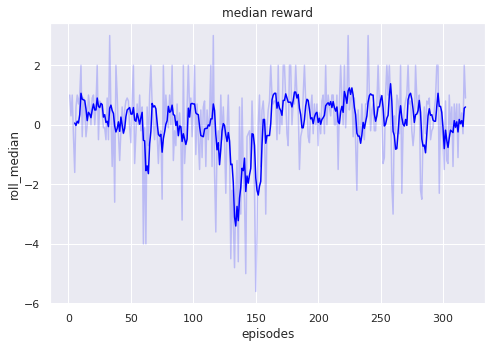

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# visualize reward each episodes
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.set_title("median reward")
sns.lineplot(x="episodes", y="roll_median", data=df, ax=ax1, color=(0, 0, 1, 1))
sns.lineplot(x="episodes", y="median", data=df, ax=ax1, color=(0, 0, 1, 0.2))
plt.tight_layout()
plt.savefig("/content/drive/My Drive/Gfootball/kaggle_simulations/rainbow/agent2/result.png")
plt.show()